## Mental Accounting

This notebook aims to recreate some of the findings of **Thaler, Richard (1985), “Mental Accounting and Consumer Choice,” Marketing Science, 4 (3), 199–214.** Specifically, we try to see if LLMs like **ChatGPT** abide by some rules of Mental Accounting and Prospect Theory.

Prospect theory states that originating from a start point, losses *weigh more heavily* than gains. Therefore, the graph depicting this phenomenon is steeper in the 3rd quadrant, than it is in the first. When confronted with a hypothetical situation in which MR. A wins 100$, *loses* 80$ and ends up with 20$, whereas Mr. B simply won 20$, the latter was perceived to be happier by the majority of participants in the study that is to be recreated in the following. 

In [1]:
import openai
import time
import matplotlib.pyplot as plt
import os 

In [2]:
# Get API key (previously saved as environmental variable)
openai.api_key = os.environ["OPENAI_API_KEY"]

## Introductory example (translated from slides)

- Prompting the model with role of random pedestrian.

In [15]:
answers = []
for _ in range(87): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 0.5, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mister A wins 100$ in a lottery. The same day he spills something on the carpet in 
          his apartment and has to pay his landlord 80$ for cleaning. Mister B wins 20$ in the lottery.
          Who would you say is happier? 
          A: Mister A
          B: Mister B
          C: No difference"""},
        {"role": "system", "content": """You are a randomly selected pedestrian asked to participate in a survey. Please answer by only giving 
         the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers.append(answer.strip())
    

- Prompting the model with role of market researcher.

In [19]:
answers_mr = []
for _ in range(87): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4",
        max_tokens = 1,
        temperature = 0.6,
        messages = [
        {"role": "user", "content": """Mister A wins 100$ in a lottery. The same day he spills something on the carpet in 
          his apartment and has to pay his landlord 80$ for cleaning. Mister B wins 20$ in the lottery.
          Who would you say is happier? Please answer by only giving the letter of the answer option:
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting.
          Please answer by only giving the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_mr.append(answer.strip())
    

In [16]:
# Collecting results without priming
A = answers.count("A")
B = answers.count("B")
C = answers.count("C")

# print(f"In the non-primed prompt the answer A was chosen {A} times, while B was chosen {B} times. Equally happy was stated {C} times.")
# print(f"In the primed prompt the answer A was chosen {A_mr} times, while B was chosen {B_mr} times. Equally happy was stated {C_mr} times.")

In [20]:
# Collecting results for prompt with priming
A_mr = answers_mr.count("A")
B_mr = answers_mr.count("B")
C_mr = answers_mr.count("C")

#### Plotting the results

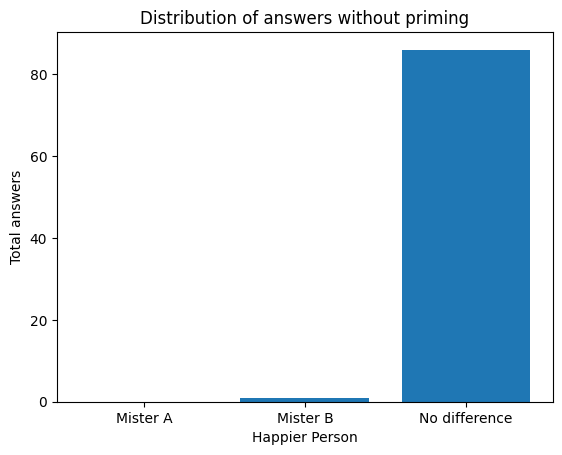

In [26]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A, B, C])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Distribution of answers without priming')

# Show the plot
plt.show()


Playing around with the *temperature* parameter I found out, that for lower values our results are as desired, whereas 
for higher values, no real systematic trend appeared to be present. The results were rather random.
Also I am not yet sure, if setting a context with the *system* role really worked.

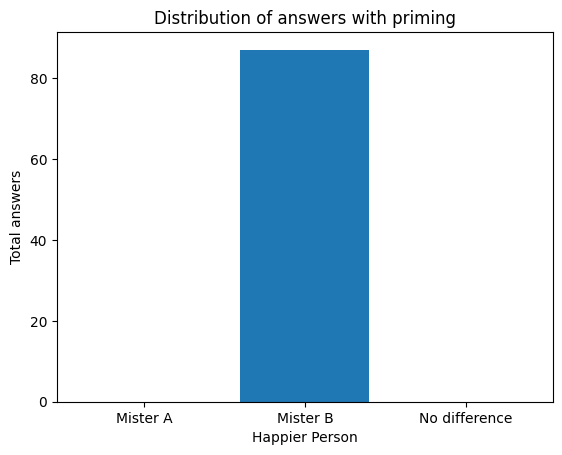

In [25]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_mr, B_mr, C_mr])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Distribution of answers with priming')

# Show the plot
plt.show()

As a preliminary result we might already conclude, that the Language Model does NOT answer according to prospect theory, unless it is specifically instructed (primed) to do so. 

## Recreating the study word by word 

#### Scenario 1
- Mr. A was given tickets to lotteries involving the World Series. He won $50 in one lottery and $25 in the other.
- Mr. B was given a ticket to a single, larger World Series lottery. He won $75. Who is happier?

| Answer option | Frequency |
|--------------|-----------|
| A            | 56        |
| B            | 16        |
| No difference | 15      |

(empirical results from the 1985 study) -> No segregation of gains for B

- Prompting the model with role of a random pedestrian

In [39]:
answers_1 = []
for _ in range(20): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 14,
        temperature = 2, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A was given tickets involcing the World Series. He won 50$ in one lottery and 25$ in the other. 
          Mr. B was given a ticket to a single, larger World Series lottery. He won 75$. Who is happier?
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a randomly selected pedestrian asked to participate in a survey. Please answer by only giving 
         the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_1.append(answer.strip())
    

In [48]:
# Collecting results
A_1 = answers_1.count("A")
B_1 = answers_1.count("B")
C_1 = answers_1.count("C")

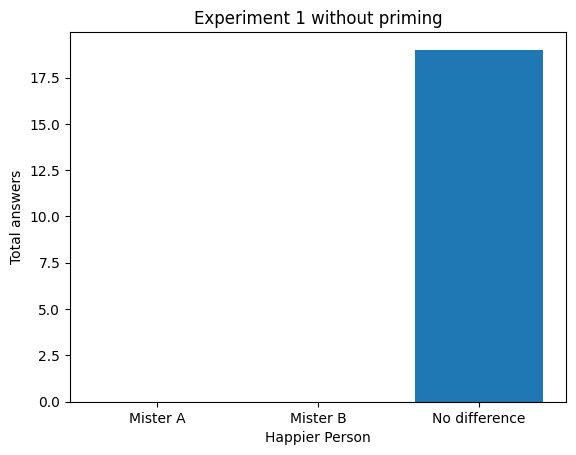

In [42]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_1, B_1, C_1])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Experiment 1 without priming')

# Show the plot
plt.show()

-  Prompting the model with role of market researcher:

In [44]:
answers_1_mr = []
for _ in range(20): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 14,
        temperature = 2, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A was given tickets involcing the World Series. He won 50$ in one lottery and 25$ in the other. 
          Mr. B was given a ticket to a single, larger World Series lottery. He won 75$. Who is happier?
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting.
          Please answer by only giving the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_1_mr.append(answer.strip())
    

In [45]:
# Collecting results for prompt with priming
A_1_mr = answers_1_mr.count("A")
B_1_mr = answers_1_mr.count("B")
C_1_mr = answers_1_mr.count("C")

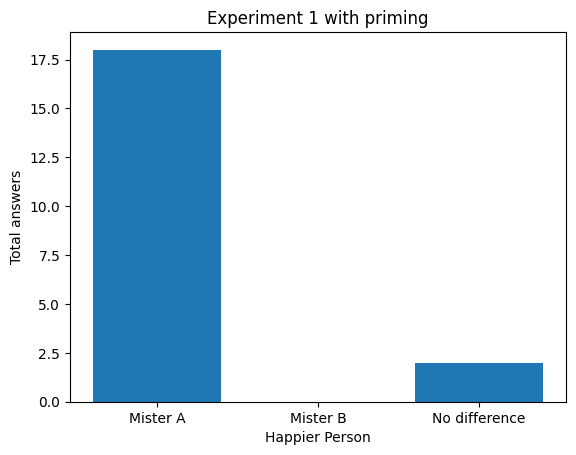

In [46]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_1_mr, B_1_mr, C_1_mr])

# Add labels and a title
plt.xlabel('Happier Person')
plt.ylabel('Total answers')
plt.title('Experiment 1 with priming')

# Show the plot
plt.show()

#### Scenario 2
- Mr. A received a letter from the IRS saying that he made a minor arithmetical mistake on his
tax return and owed $100. He received a similar letter the same day from his state income tax
authority saying he owed $50. There were no other repercussions from either mistake.
- Mr. B received a letter from the IRS saying that he made a minor arithmetical mistake on his tax
return and owed $150. There were no other repercussions from his mistake. Who was more upset?

| Answer option | Frequency |
|--------------|-----------|
| A            | 66        |
| B            | 14        |
| No difference | 7      |

(empirical results from the 1985 study) -> No integration of losses for B


- Prompting the model with role of a random pedestrian

In [51]:
answers_2 = []
for _ in range(20): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A received a letter from the IRS saying that he made a minor arithmetical mistake on his
         tax return and owed $100. He received a similar letter the same day from his state income tax
         authority saying he owed $50. There were no other repercussions from either mistake. 
         Mr. B received a letter from the IRS saying that he made a minor arithmetical mistake on his tax
         return and owed $150. There were no other repercussions from his mistake. Who was more upset?
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a randomly selected pedestrian asked to participate in a survey. Please answer by only giving 
         the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_2.append(answer.strip())
    

In [52]:
# Collecting results for prompt with priming
A_2 = answers_2.count("A")
B_2 = answers_2.count("B")
C_2 = answers_2.count("C")

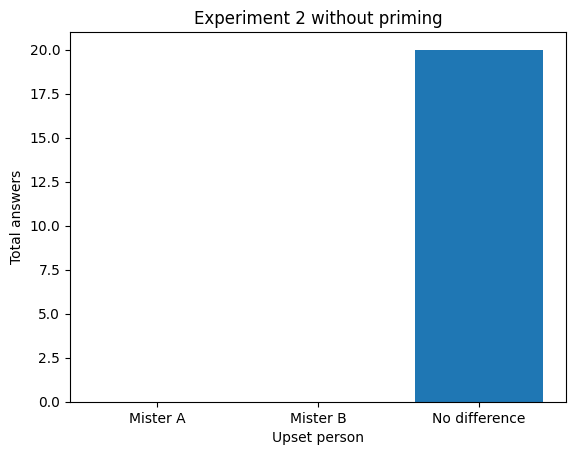

In [59]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_2, B_2, C_2])

# Add labels and a title
plt.xlabel('Upset person')
plt.ylabel('Total answers')
plt.title('Experiment 2 without priming')

# Show the plot
plt.show()

- Prompting the model with role of market researcher. 

In [80]:
answers_2_mr = []
for _ in range(20): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A received a letter from the IRS saying that he made a minor arithmetical mistake on his
         tax return and owed $100. He received a similar letter the same day from his state income tax
         authority saying he owed $50. There were no other repercussions from either mistake. 
         Mr. B received a letter from the IRS saying that he made a minor arithmetical mistake on his tax
         return and owed $150. There were no other repercussions from his mistake. Who is more upset?
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting.
          Please answer by only giving the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_2_mr.append(answer.strip())
    

In [81]:
# Collecting results for prompt with priming
A_2_mr = answers_2_mr.count("A")
B_2_mr = answers_2_mr.count("B")
C_2_mr = answers_2_mr.count("C")

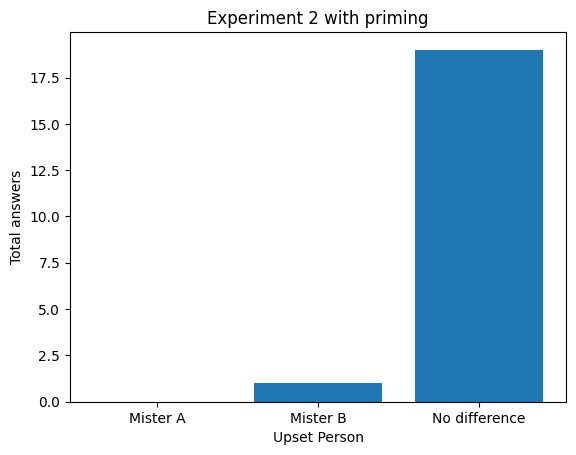

In [82]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_2_mr, B_2_mr, C_2_mr])

# Add labels and a title
plt.xlabel('Upset Person')
plt.ylabel('Total answers')
plt.title('Experiment 2 with priming')

# Show the plot
plt.show()

Phrasing the problem like this, after multiple attempts, it seems as if the model only applies Prospect Theory *in one way*. Therefore, we now rephrase the question to again ask for the happier person instead of asking who is more upset.

In [85]:
answers_2_mr2 = []
for _ in range(20): # original experiment had 87 answers
    response = openai.ChatCompletion.create(
        model = "gpt-4", # model = "gpt-3.5-turbo", "gpt-4"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """Mr. A received a letter from the IRS saying that he made a minor arithmetical mistake on his
         tax return and owed $100. He received a similar letter the same day from his state income tax
         authority saying he owed $50. There were no other repercussions from either mistake. 
         Mr. B received a letter from the IRS saying that he made a minor arithmetical mistake on his tax
         return and owed $150. There were no other repercussions from his mistake. Who is happier?
          A: Mister A
          B: Mister B
          C: No difference."""},
        {"role": "system", "content": """You are a market researcher and focus on Prospect Theory and Mental Accounting.
          Please answer by only giving the letter of the answer option A, B or C."""}
                   ])

    # Store the answer in the list
    answer = response['choices'][0]['message']['content']
    answers_2_mr2.append(answer.strip())
    

In [86]:
# Collecting results for prompt with priming
A_2_mr2 = answers_2_mr2.count("A")
B_2_mr2 = answers_2_mr2.count("B")
C_2_mr2 = answers_2_mr2.count("C")

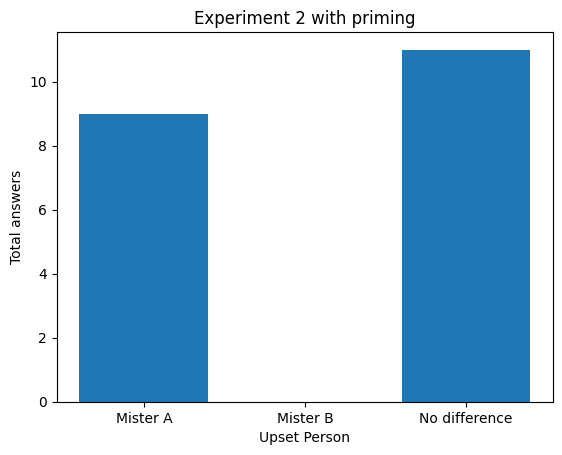

In [87]:
# Set labels
labels = ['Mister A', 'Mister B', 'No difference']

# Create a bar graph
plt.bar(labels, [A_2_mr2, B_2_mr2, C_2_mr2])

# Add labels and a title
plt.xlabel('Upset Person')
plt.ylabel('Total answers')
plt.title('Experiment 2 with priming')

# Show the plot
plt.show()

We can now see, that the phrasing of the question has a considerate impact on the *survey* outcome. This issue might be tackled with a more concise prompt resulting in more similar distributions for both ways of asking the question. However, we tried to recreate the experiment 1 by 1. This approach would also illustrate a common issue in this kind of research: When the LLM was trained with data containing the exact experiment we now try to recreate, we will naturally get similar results as in the original study. Judging by our results so far, for this specific study, this issue seems negligible. 